In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#implementation of the perceptron model(classifier model)
class perceptron(object):
    def __init__(self,eta=0.1,n_iter=100):
        self.eta = eta;
        self.n_iter = n_iter;
    #now we need to train our model 
    def fit(self,X,y):
        #how to fit it 
        #we will requiring weights numpy array
        #that are randomly initialized
        self.w_ = np.zeros(1+X.shape[1])
        # we are now having all the weights that are initialized to be zeros
        self.errors_ = [] #this will be storing number of misclassifications corresponding to each updated weight 
        #and weights will be updated epoch number of times(passes)
        for k in  range(self.n_iter):
            error=0;
            for xi,target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                #target will be simply a number between 1 and -1 in case of binary classification
                self.w_[1:] +=update*(xi)
                self.w_[0]+=update
                #all the feature weights are now updated 
                error+=int(update!=0.0) #here error is the total number of misclassifications 
            self.errors_.append(error)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,-1)

In [3]:
#so we have now implemented the perceptron model now lets check it out
#using perceptron implementation we can now initialize new perceptron objects with learning rate and different number of  iterations

In [4]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
data.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
np.unique(data[4])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
y = data.iloc[:100,4].values

In [8]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [9]:
data[4].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [10]:
y = np.where(y=="Iris-setosa",-1,1)

In [11]:
y.shape

(100,)

In [12]:
#so we are basically designing just a binary classifier in which we are having two classes 

In [13]:
X = data.iloc[:100,[0,2]].values

In [14]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [15]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

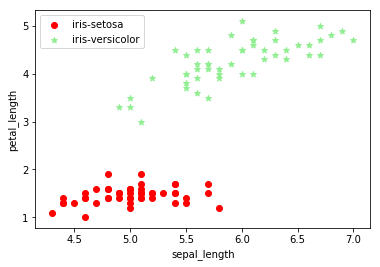

In [16]:
plt.scatter(X[:50,0],X[:50,1],marker="o",color="r",label="iris-setosa")
plt.scatter(X[50:100,0],X[50:100,1],marker="*",color="lightgreen",label="iris-versicolor")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend(loc="upper left")
plt.show()

Text(0, 0.5, 'number_misclassifications')

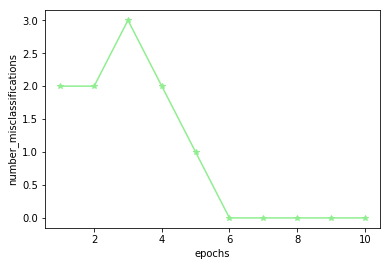

In [17]:
ppn = perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
n_iter=10
#let's plot the number of misclassified examples corresponding to each epoch (training passes)
plt.plot(range(1,n_iter+1),ppn.errors_,color="lightgreen",marker="*")
plt.xlabel("epochs")
plt.ylabel("number_misclassifications")

In [18]:
ppn.predict([[5.5,1]])

array([-1])

In [19]:
#now we need to decision boundary using functions 

In [20]:
from matplotlib.colors import ListedColormap

In [39]:
def plot_decision_regions(X,y,classifier,resolution=.01):
    #setup the marker generator and colormap
    markers = ('s','x','o','^','v')
    colors = ("red","blue","lightgreen","gray","cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot the class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


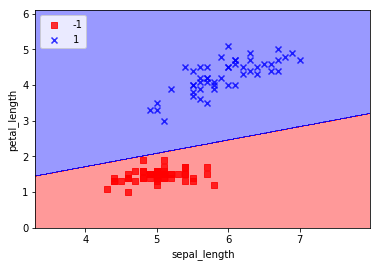

In [40]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend(loc="upper left")

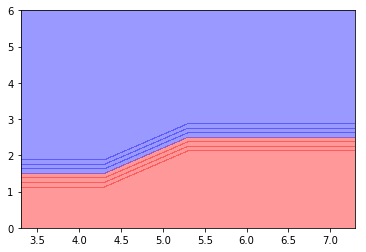

In [63]:
markers = ('s','x','o','^','v')
colors = ("red","blue","lightgreen","gray","cyan")
cmap = ListedColormap(colors[:len(np.unique(y))])
x1_min,x1_max = X[:,0].min()-1,X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max),np.arange(x2_min,x2_max))
Z = ppn.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1,xx2,Z,alpha=0.4,cmap =cmap)

In [59]:
Z.reshape(xx1.shape)

array([[-1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1],
       [ 1,  1, -1, -1, -1],
       [ 1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1]])

In [57]:
np.array([xx1.ravel(),xx2.ravel()]).T

array([[3.3, 0. ],
       [4.3, 0. ],
       [5.3, 0. ],
       [6.3, 0. ],
       [7.3, 0. ],
       [3.3, 1. ],
       [4.3, 1. ],
       [5.3, 1. ],
       [6.3, 1. ],
       [7.3, 1. ],
       [3.3, 2. ],
       [4.3, 2. ],
       [5.3, 2. ],
       [6.3, 2. ],
       [7.3, 2. ],
       [3.3, 3. ],
       [4.3, 3. ],
       [5.3, 3. ],
       [6.3, 3. ],
       [7.3, 3. ],
       [3.3, 4. ],
       [4.3, 4. ],
       [5.3, 4. ],
       [6.3, 4. ],
       [7.3, 4. ],
       [3.3, 5. ],
       [4.3, 5. ],
       [5.3, 5. ],
       [6.3, 5. ],
       [7.3, 5. ],
       [3.3, 6. ],
       [4.3, 6. ],
       [5.3, 6. ],
       [6.3, 6. ],
       [7.3, 6. ]])

In [64]:
ppn.predict([7.3,6])

array(1)

In [65]:
#the function plt.contourf maps different regions to different colors for each predicted class in the grid array

In [66]:
#adaptive linear neuron(Adaline):